In [2]:
!pip install opencv-python

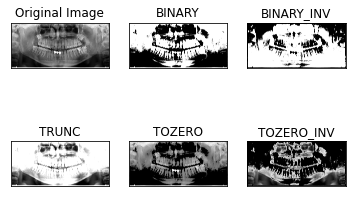

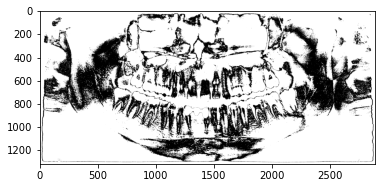

In [4]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('../Sample Images/train_72.png',0)
ret,thresh1 = cv.threshold(img,100,255,cv.THRESH_BINARY)
ret,thresh2 = cv.threshold(img,130,255,cv.THRESH_BINARY_INV)
ret,thresh3 = cv.threshold(img,100,255,cv.THRESH_TRUNC)
ret,thresh4 = cv.threshold(img,100,255,cv.THRESH_TOZERO)
ret,thresh5 = cv.threshold(img,100,255,cv.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

a=cv.bitwise_xor(thresh1,thresh2)
plt.imshow(a,cmap='gray')

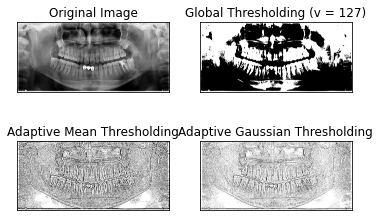

1474


True

In [5]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('../Sample Images/train_72.png',0)
img = cv.medianBlur(img,5)
ret,th1 = cv.threshold(img,110,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()


contours, hierarchy = cv.findContours(th1, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
i=cv.drawContours(th1, contours, -1, (100,100,100), 10)
print(len(contours))
cv.imwrite('contor.jpg',i)
f=cv.imread('../Sample Images/train_72.png')
hull_list = []
for i in range(len(contours)):
    hull = cv.convexHull(contours[i])
    hull_list.append(hull)
    
drawing = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
for i in range(len(contours)):
    color = (100,100,100)
    cv.drawContours(f, contours, i, (255,255,255))
    cv.drawContours(f, hull_list, i, color)

cv.imwrite('hull.jpg', drawing)



In [6]:
import numpy as np
import cv2 as cv
Z = th1

Z = np.float32(Z)

criteria = ( cv.TERM_CRITERIA_MAX_ITER, 4,1.0)
K = 2
ret,label,center=cv.kmeans(Z,K,None,criteria,10,cv.KMEANS_PP_CENTERS)

center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))
cv.imwrite('res2.jpg',res2)


True

In [7]:

import cv2
import numpy as np


kernel = np.ones((3,3), dtype=np.uint8)
closing = cv2.morphologyEx(th1, cv2.MORPH_CLOSE, kernel)
contours, hierarchy = cv2.findContours(th1, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
cnt = max(contours, key=cv2.contourArea)
x,y,w,h = cv2.boundingRect(cnt)
cv2.rectangle(th1, (x,y), (x+w, y+h), (255,255,0), 1)
cv2.imwrite('img.jpg', img)




True

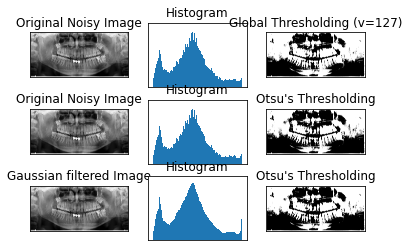

In [9]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('../Sample Images/train_72.png',0)

ret1,th1 = cv.threshold(img,100,255,cv.THRESH_BINARY)

ret2,th2 = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

blur = cv.GaussianBlur(img,(5,5),0)
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()